<a href="https://colab.research.google.com/github/Valeram12/neural-networks/blob/main/lab6/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

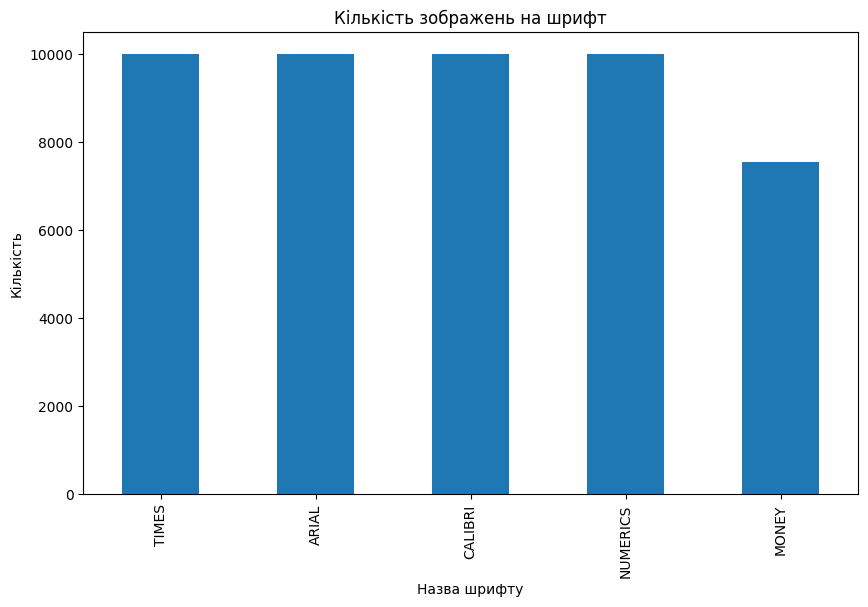

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models



# Попередньо було створено датасет з 5 шрифтами (main.py)

df = pd.read_csv("https://raw.githubusercontent.com/Valeram12/neural-networks/refs/heads/main/lab6/fonts.csv")

# Діаграма, щоб побачити кількість даних для кожного шрифта
font_counts = df['font'].value_counts()

plt.figure(figsize=(10, 6))
font_counts.plot(kind='bar')
plt.title('Кількість зображень на шрифт')
plt.xlabel('Назва шрифту')
plt.ylabel('Кількість')
plt.show()

Перегляд даних в датасеті

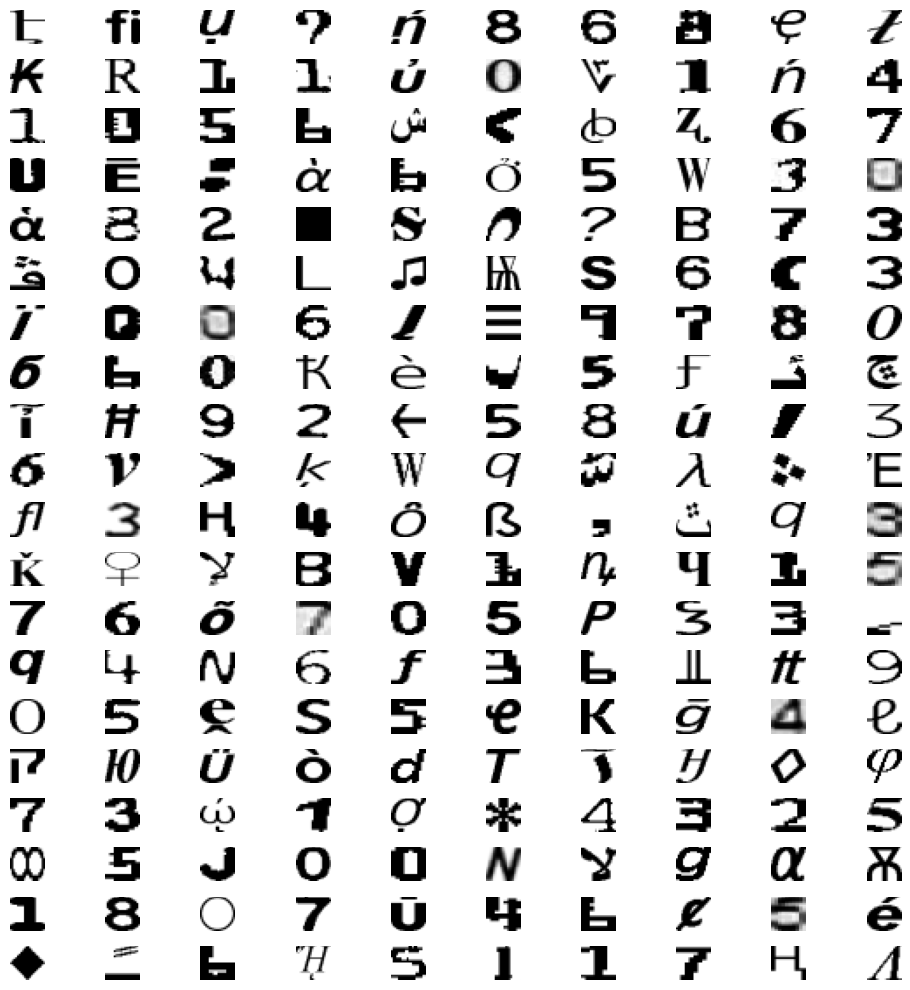

In [7]:
def extract_image(index):
    pixel_data = df.iloc[index:index + 1, 1:401].values.reshape((20, 20))
    return (255 - pixel_data).astype(np.uint8)

columns, rows = 10, 20
fig, axes_grid = plt.subplots(rows, columns, figsize=(10, 10))

for row in range(rows):
    for col in range(columns):
        img_index = row * columns + col
        axes_grid[row, col].imshow(extract_image(img_index), cmap='gray')
        axes_grid[row, col].axis('off')

plt.tight_layout()
plt.show()

# Навчання

In [8]:
def plot_training_history(history_data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].plot(history_data['accuracy'], label='Training Accuracy')
    axes[0].plot(history_data['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='upper left')

    axes[1].plot(history_data['loss'], label='Training Loss')
    axes[1].plot(history_data['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()


def fit_model_and_plot(model, num_epochs, batch_size, existing_history=None):
    new_history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    if existing_history:
        for metric, values in new_history.history.items():
            existing_history.setdefault(metric, []).extend(values)
        combined_history = existing_history
    else:
        combined_history = new_history.history

    plot_training_history(combined_history)

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = pd.get_dummies(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


Спробувавши декілька варіантів моделей, дійшов до найкращого результату:

Epoch 1/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4701 - loss: 9.2228 - val_accuracy: 0.6576 - val_loss: 0.8187
Epoch 2/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6550 - loss: 0.8357 - val_accuracy: 0.6918 - val_loss: 0.7190
Epoch 3/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7120 - loss: 0.6937 - val_accuracy: 0.7322 - val_loss: 0.6406
Epoch 4/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7402 - loss: 0.6201 - val_accuracy: 0.7384 - val_loss: 0.6328
Epoch 5/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7597 - loss: 0.5849 - val_accuracy: 0.7336 - val_loss: 0.6188
Epoch 6/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7804 - loss: 0.5286 - val_accuracy: 0.7469 - val_loss: 0.6330
Epoch 7/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7903 - loss: 0.5034 - val_accuracy: 0.7670 - val_loss: 0.5495
Epoch 8/20
846/846 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8028 - loss: 0.4717 - val_accu

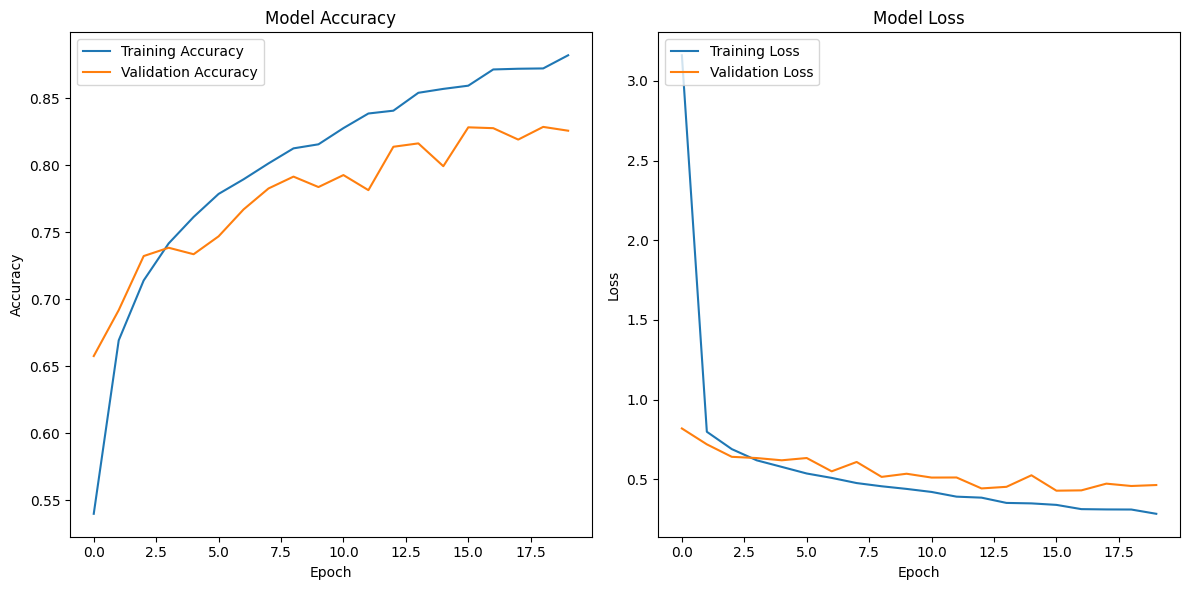

In [25]:
model = models.Sequential()

model.add(layers.InputLayer(shape=(X.shape[1],)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = {}
fit_model_and_plot(model, 20, 45, history)

Epoch 1/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4598 - loss: 10.8873 - val_accuracy: 0.6272 - val_loss: 0.8567
Epoch 2/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6469 - loss: 0.8391 - val_accuracy: 0.6855 - val_loss: 0.7318
Epoch 3/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7045 - loss: 0.6986 - val_accuracy: 0.7121 - val_loss: 0.6776
Epoch 4/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7263 - loss: 0.6492 - val_accuracy: 0.7425 - val_loss: 0.6174
Epoch 5/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7550 - loss: 0.5855 - val_accuracy: 0.7541 - val_loss: 0.5850
Epoch 6/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7664 - loss: 0.5529 - val_accuracy: 0.7640 - val_loss: 0.5643
Epoch 7/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7749 - loss: 0.5408 - val_accuracy: 0.7717 - val_loss: 0.5492
Epoch 8/50
846/846 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7904 - loss: 0.5006 - val_accu

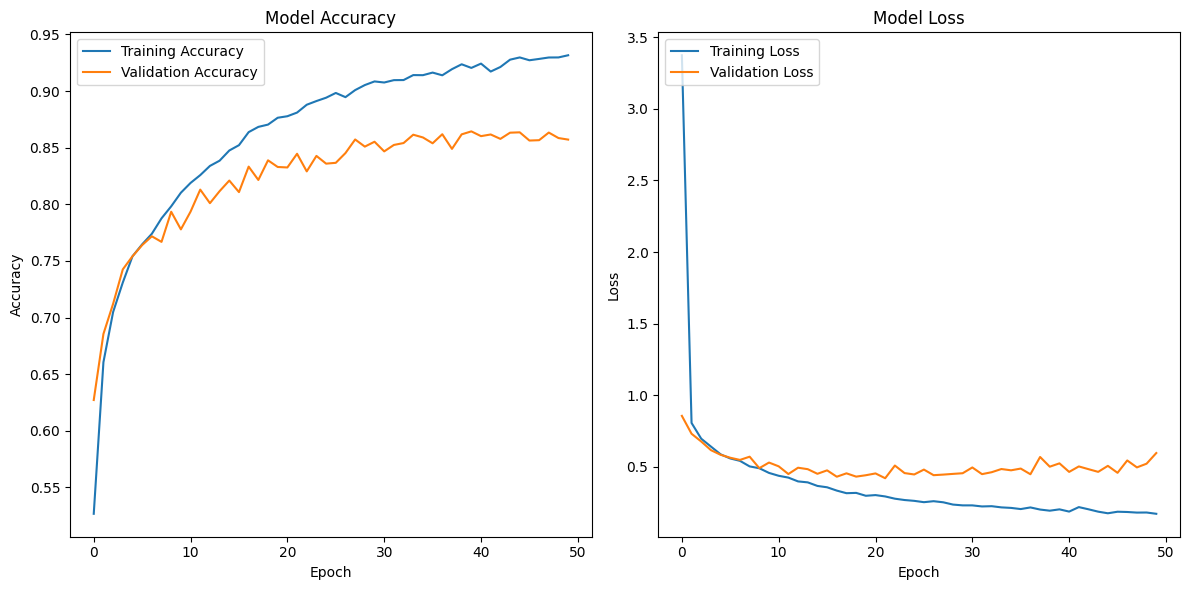

In [34]:
model1 = models.Sequential()

model1.add(layers.InputLayer(shape=(X.shape[1],)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dropout(0.01))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.01))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.01))
model1.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = {}
fit_model_and_plot(model1, 50, 45, history1)